# WeatherPy
----



In [144]:

import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from api_keys import weather_api_key
from pprint import pprint
import time
import os

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [147]:
city_weather_dict = {
    'City': cities_gathered,  
    'Lat': city_lats,
    'Lng': city_longs,
    'Max Temp': city_temps,
    'Humidity': city_hums,
    'Cloudiness': city_clouds,
    'Wind Speed': city_winds,
    'Country': countries_gathered,
    'Date': city_dates
    }
city_weather_data = pd.DataFrame(city_weather_dict)
city_weather_data
out_file = os.path.join('Output', 'city_weather_data.csv')
city_weather_data.to_csv(out_file, index=False)

In [148]:
city_weather_data_describe = city_weather_data.describe()
city_weather_data_describe

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,6.560000e+02
mean,20.777195,21.593003,64.997561,71.545732,50.585366,8.470290,1.600398e+09
std,33.506888,90.328259,15.257493,20.277564,39.397082,6.142695,1.079452e+02
min,-54.800000,-179.170000,19.240000,3.000000,0.000000,0.020000,1.600397e+09
25%,-5.240000,-57.855000,53.600000,61.000000,5.750000,3.917500,1.600398e+09
50%,24.040000,25.735000,66.200000,77.000000,49.500000,6.930000,1.600398e+09
75%,50.125000,100.152500,78.010000,86.000000,90.000000,11.410000,1.600398e+09
max,78.220000,178.420000,94.280000,100.000000,100.000000,43.730000,1.600398e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [149]:
#  Get the indices of cities that have humidity over 100%.
cd_greater_humidity = city_weather_data.loc[city_weather_data['Humidity'] > 100]

print(f'City weather data length is {len(city_weather_data)}')
print(f'Greater humidity length is {len(cd_greater_humidity)}')
cd_greater_humidity

City weather data length is 656
Greater humidity length is 0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [150]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_data.drop(cd_greater_humidity.index, inplace=False)

print(f'Total records in clean_city_data dataframe is {len(clean_city_data)}')
clean_city_data

Total records in clean_city_data dataframe is 656


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,82.56,78,69,9.24,MV,1600397488
1,Somanda,-3.37,33.95,61.47,53,56,6.11,TZ,1600397489
2,Castro,-42.47,-73.77,46.00,83,64,4.14,CL,1600397489
3,Rivera,-30.91,-55.55,56.32,89,0,4.43,UY,1600397489
4,Yellowknife,62.46,-114.35,46.40,70,75,12.75,CA,1600397490
...,...,...,...,...,...,...,...,...,...
651,Tianpeng,30.99,103.94,73.40,73,98,4.47,CN,1600397798
652,Arkhangelsk,64.54,40.54,33.80,93,40,6.71,RU,1600397798
653,Manokwari,-0.87,134.08,84.85,64,0,3.62,ID,1600397798
654,Kasangulu,-4.59,15.17,73.40,88,75,4.43,CD,1600397799


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

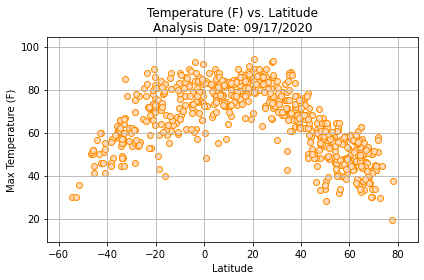

In [151]:
lat = clean_city_data['Lat']
max_temp = clean_city_data['Max Temp']


plt.scatter(x=lat, y=max_temp, marker="o", facecolors="peachpuff", edgecolors="darkorange")
plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(max_temp)-10, max(max_temp)+10)
plt.grid(b=None, which='major', axis='both')

plt.tight_layout()

plt.savefig(os.path.join("Output","maxtemps_lats.png"))

## Latitude vs. Humidity Plot

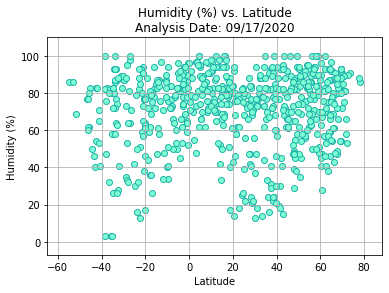

In [152]:
humidity = clean_city_data['Humidity']

plt.scatter(x=lat, y=humidity, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")
plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(humidity)-10, max(humidity)+10)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats.png"))

## Latitude vs. Cloudiness Plot

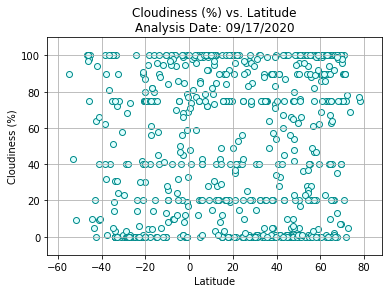

In [153]:
cloudiness = clean_city_data['Cloudiness']

plt.scatter(x=lat, y=cloudiness, marker="o", facecolors="lightcyan", edgecolors="darkcyan")
plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(cloudiness)-10, max(cloudiness)+10)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats.png"))

## Latitude vs. Wind Speed Plot

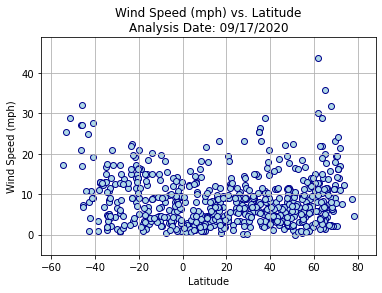

In [154]:
wind_speed = clean_city_data['Wind Speed']

plt.scatter(x=lat, y=wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")
plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(wind_speed)-5, max(wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats.png"))

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is -0.817
The p-value is 1.1059735143024272e-110


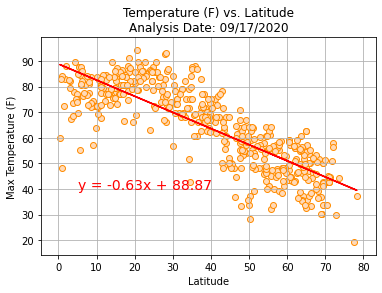

In [155]:
northern = clean_city_data.loc[clean_city_data['Lat'] >=0]
southern = clean_city_data.loc[clean_city_data['Lat'] <0]

northern_lats = northern['Lat']
northern_max_temps = northern['Max Temp']

correlation = sts.pearsonr(northern_lats, northern_max_temps)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_max_temps)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=northern_lats, y=northern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 40), fontsize=14, color="red")


plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_max_temps)-5, max(northern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_latitude_lr_north.png"))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is 0.699
The p-value is 1.3400898797747413e-30


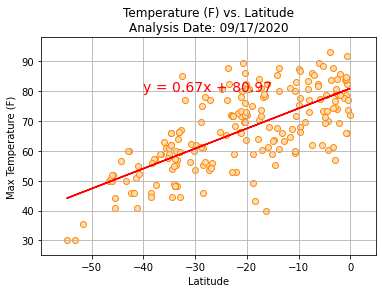

In [156]:
southern_lats = southern['Lat']
southern_max_temps = southern['Max Temp']

correlation = sts.pearsonr(southern_lats, southern_max_temps)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_max_temps)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-40, 80), fontsize=14, color="red")


plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_max_temps)-5, max(southern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_lats_lr_south.png"))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.031
The p-value is 0.5091656849158472


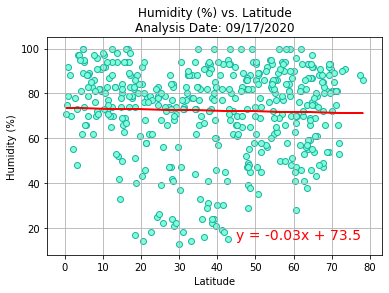

In [157]:
northern_hums = northern['Humidity']

correlation = sts.pearsonr(northern_lats, northern_hums)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_hums)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (45, 15), fontsize=14, color="red")


plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_hums)-5, max(northern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_north.png"))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.14
The p-value is 0.04874233280947229


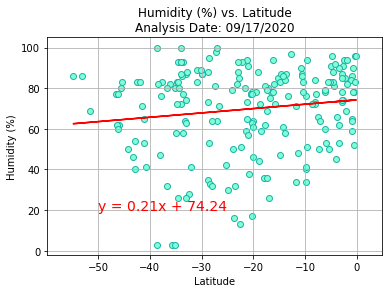

In [158]:
southern_hums = southern['Humidity']

correlation = sts.pearsonr(southern_lats, southern_hums)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_hums)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=southern_lats, y=southern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")


plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_hums)-5, max(southern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_south.png"))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.013
The p-value is 0.774613903775449


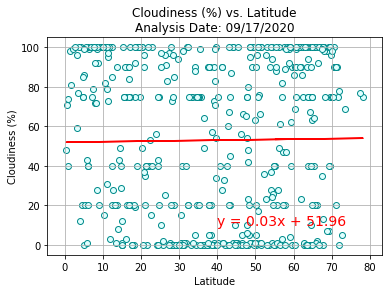

In [159]:
northern_clouds = northern['Cloudiness']

correlation = sts.pearsonr(northern_lats, northern_clouds)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_clouds)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (40, 10), fontsize=14, color="red")


plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_clouds)-5, max(northern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_north.png"))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.037
The p-value is 0.5993305188556938


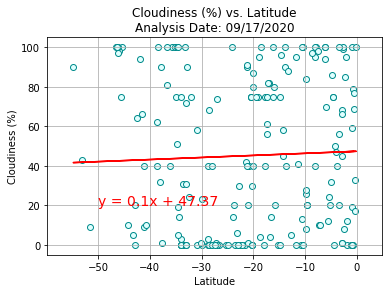

In [160]:
southern_clouds = southern['Cloudiness']

correlation = sts.pearsonr(southern_lats, southern_clouds)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_clouds)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")


plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_clouds)-5, max(southern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_south.png"))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.225
The p-value is 1.1881299071644244e-06


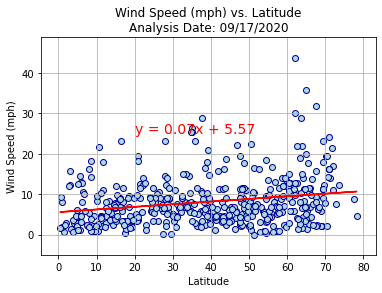

In [161]:
northern_wind_speed = northern['Wind Speed']

correlation = sts.pearsonr(northern_lats, northern_wind_speed)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_wind_speed)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (20,25), fontsize=14, color="red")


plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_wind_speed)-5, max(northern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_north.png"))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.339
The p-value is 8.793179836345461e-07


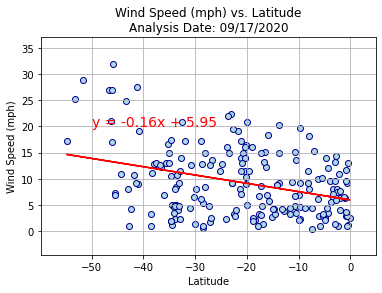

In [162]:
southern_wind_speed = southern['Wind Speed']


correlation = sts.pearsonr(southern_lats, southern_wind_speed)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_wind_speed)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50,20), fontsize=14, color="red")


plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_wind_speed)-5, max(southern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_south.png"))